<a href="https://colab.research.google.com/github/njqm10/ProgrammingProjects/blob/main/ReinforcementNim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using reinforcement learning to play "Nim"
<p align="justify"> Click the google colab button on the top to open this project and google colab (to use GPU and other important things). In this project, we are going to be using the popular machine learning techique known as "Reinforcemente Learning". Specifically, we are going to be using an algorithm known as q-learning (but more on that later).</p>
<hr>
<p align="justify"><i>Important disclaimer (as requeried by some colleges): This project was mostly done by myself as part of a project for a online HarvardX verified course on EDX (Introduction to artificial intelligence). There was some base code provided from them as part of as a prompt for the project.  This project has nothing to do with my school activities or  institutionally-guided extracurriculars. I was the only contributor and programmer of the project (aside form base-given code). No teacher nor mentor was in-charge of supervising the project. I have a lot of similar coding projects on my youtube channel (which is used to present coding works of the before mentioned EDX course). However, I think this project is the most representantive and interesting ones out of those. Reinforcement learning was not covered in any other of the projects in the portofolio, so I believe this a simple, yet good addition.</i></p>

###How to play Nim
<p align="justify"><i>Important note: Nim is a solved game, and it has been proven mathematically that there is a way to always win if you play first. Therefore, you will win if you use this method against the AI. But that is how math works and not the AIs fault. Try to play without these tricks to have a good .</i> </p>
<p align="justify">First, we will be taking some time to explain what is the game Nim and how to play it. If you already know how the game works, you can skip this section without problems. Just keep in mind that we are playing with the "last payer to remove an object" losses version of the game.</p>

<p align="justify">The game Nim is pretty simple and straightforward. It is played by two players. In the game, you first have to create certain number of piles. Each of these piles, has to have certain amount of objects. The number of piles and the number of objects per pile can be decided by the players. For example, 2 players can decided to play with the popular chocolates M&Ms. Next, they will then decide how many piles they wish to have for their game and how many M&Ms each pile is going to have.</p>

<p align="justify">Keeping up with the M&Ms example. Let us say that our 2 fictional players decided to make 3 M&Ms piles. Additionally, they decided that the first pile was going to have 10 M&Ms. The second pile was going to have 8, and the third 13. The following illustration is a replica of this example:</p>

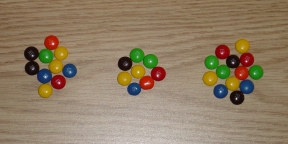

<p align="justify">Now that the set-up is done, they can start playing the game. The first player, has to choose one pile. Then, he has to decide how many objects he is going to take from that pile. After this, his turn has ended and the other player has to do exactly the same. When you are forced to take the last object of the pile, you have lost the game.</p>

<p align="justify">A sample game (taking our M&Ms example as a base) can go like this:</p>


1.   Player one takes 6 items from pile 1. (4 remaining in this pile)
2.   Player two takes 4 items from pile 1. (0 remaining in this pile)
3.   Player one takes 8 items from pile 2. (0 remaining in this pile)
4.   Player two takes 12 iterms from pile 3. (1 remaining in this pile)
5.   Player one takes 1 item from pile 3. (0 remaining in this pile)
6.   Player 2 won the game.

###Rules for our game

<p align="justify">In our game, we are going to be using 4 piles (pile 0, pile 1, pile 2, and pile 3). Each pile is going to have 1,3,5,7 objects respectively.</p>

###Creating the game
<p align="justify">Before creating our Artificial Intelligence, we first have to create the game board interface. To do so, we are going  to create a class called Nim. Note that I will using code formated text (not real code) to write the class. This is to explain chuncks of code that would not be runnable by itself and should not be chunked. However, after explaining the whole class, I will write the code for the entire class as a runnable jupyter notebook cell. </p>

<p align="justify">First we will create the class and initialize it.</p>

<p align="justify">In this chunck of code we are simply defining how the game will be created. We defned the number of items per pile, we defined the player and we defined the winner.</p>

```
class Nim():
    def __init__(self, initial=[1, 3, 5, 7]):
        """
        Initialize game board.
        Each game board has
            - `piles`: a list of how many elements remain in each pile
            - `player`: 0 or 1 to indicate which player's turn
            - `winner`: None, 0, or 1 to indicate who the winner is
        """
        self.piles = initial.copy()
        self.player = 0
        self.winner = None
```
<p align="justify">Now we are going to define all the available actions given a certain configuration of piles. For example, if we are give the following pile configuration: [1,4,0,2] a valid action could be taking 1 from pile 0. We would write this in the format (0,1). Another example of a valid action could be. Taking 3 from pile 1 or (1,3).</p>

```
@classmethod
def available_actions(cls, piles):
   """
   Nim.available_actions(piles) takes a `piles` list as input
   and returns all of the available actions `(i, j)` in that state.
   Action `(i, j)` represents the action of removing `j` items
   from pile `i` (where piles are 0-indexed).
   """
   actions = set()
   for i, pile in enumerate(piles):
     for j in range(1, pile + 1):
       actions.add((i, j))
    return actions

```
<p align="justify">Now, we create a simple method to know who is the player that is going to play next. We als create a method to switch players accordingly.</p>

```
@classmethod
def other_player(cls, player):
   """
   Nim.other_player(player) returns the player that is not
  `player`. Assumes `player` is either 0 or 1.
   """
   return 0 if player == 1 else 1

def switch_player(self):
    """
    Switch the current player to the other player.
    """
    self.player = Nim.other_player(self.player)
```
<p align="justify">Now we are gong to define the action of making a move. Let us remember that a move consist of choosing a pile and then choosing how many objects we are going to extract from it. This method also updates the board. Note that we only check for game related errors. So please do not input something like "x" and input numbers only.</p>

```
def move(self, action):
        """
        Make the move `action` for the current player.
        `action` must be a tuple `(i, j)`.
        """
        pile, count = action

        # Check for errors
        if self.winner is not None:
            raise Exception("Game already won")
        elif pile < 0 or pile >= len(self.piles):
            raise Exception("Invalid pile")
        elif count < 1 or count > self.piles[pile]:
            raise Exception("Invalid number of objects")

        # Update pile
        self.piles[pile] -= count
        self.switch_player()

        # Check for a winner
        if all(pile == 0 for pile in self.piles):
            self.winner = self.player
```

<p align="justify">Now, we run this code on a real cell</p>

In [ ]:
import math
import random
import time


class Nim():

    def __init__(self, initial=[1, 3, 5, 7]):
        """
        Initialize game board.
        Each game board has
            - `piles`: a list of how many elements remain in each pile
            - `player`: 0 or 1 to indicate which player's turn
            - `winner`: None, 0, or 1 to indicate who the winner is
        """
        self.piles = initial.copy()
        self.player = 0
        self.winner = None

    @classmethod
    def available_actions(cls, piles):
        """
        Nim.available_actions(piles) takes a `piles` list as input
        and returns all of the available actions `(i, j)` in that state.

        Action `(i, j)` represents the action of removing `j` items
        from pile `i` (where piles are 0-indexed).
        """
        actions = set()
        for i, pile in enumerate(piles):	
            for j in range(1, pile + 1):
                actions.add((i, j))
        return actions

    @classmethod
    def other_player(cls, player):
        """
        Nim.other_player(player) returns the player that is not
        `player`. Assumes `player` is either 0 or 1.
        """
        return 0 if player == 1 else 1

    def switch_player(self):
        """
        Switch the current player to the other player.
        """
        self.player = Nim.other_player(self.player)

    def move(self, action):
        """
        Make the move `action` for the current player.
        `action` must be a tuple `(i, j)`.
        """
        pile, count = action

        # Check for errors
        if self.winner is not None:
            raise Exception("Game already won")
        elif pile < 0 or pile >= len(self.piles):
            raise Exception("Invalid pile")
        elif count < 1 or count > self.piles[pile]:
            raise Exception("Invalid number of objects")

        # Update pile
        self.piles[pile] -= count
        self.switch_player()

        # Check for a winner
        if all(pile == 0 for pile in self.piles):
            self.winner = self.player


###Understanding the q-learning method

<p align="justify">The q-learning method is extremely intuitive once we have some basic artificial intelligence concepts. So first, we are going to clarify the ones we need. </p>

####State
<p align="justify">The state is the current information of our problem. States vary greatly from problem to problem. You can think of states as all the valuable information in a given moment. In chess, a board position would be a state. When solving a rubiks cube, the moments between move and move are states. So basically, any frozen moment of a problem, with all its information is a state.</p>

<p align="justify">Some examples of states are:</p>

<p align="justify">Chess State:</p>

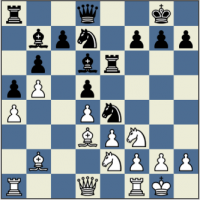


<p align="justify">Tic Tac Toe State:</p>

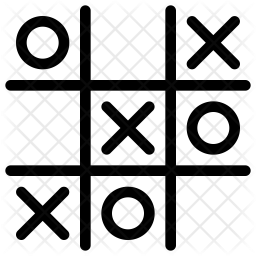

####Action
<p align="justify">An action is anything capable of modifyng a state. Its name is pretty self explanatory. An action is somethign that you can do (giver certain state) to go to another state. In tic-tac-toe for example, writing an X or an O on an empty tile is an action. It passes you from a state (without an X or an O) to a new state (with an X or an O).</p>

####Agent
<p align="justify">An Agent is anyone capable of performing actions. In our case, the agents are the AI and ourselves.</p>

###Q-Learning
<p align="justify">Now we can really talk about q-learning. Q-learning is only a method to tell an Agent what action to take given a certain state. For example, through q-learning, an AI can learn which move to play on a certain chess board state. </p>

<p align="justify">But how? Well, q-learning does this by a method of rewards and punishments. Rewards and punishments could also be called "feedbacks". Punishments can be thought of as negative rewards as well. This method encourages the agent to take actions with maximize its reward (or minimizes its punishment).</p>

 <p align="justify">In our case, rewards take the form of numerical values. If we do a move which immediately loses the game, we will have a reward of -1 (punishment). However, if we perform a winning move, we receive a reward of 1. If we take a neutral non-end-gaming move the reward score will be 0.</p>

 <p align="justify">This, however, is not a good enough training system. Let us say, for example, that you make a chess move that hangs mate in 2 (loosing in 2 more moves). Your reward for that specific move (according to our current system) will be 0. But, that does not make any sense. The move was a terrible move. What can we do then?</p>

<p align="justify">That is when q learning comes in. Q learning is a method to learn a reward value for every (state, action) pair. The difference with q-learning, it is that it also takes into account future rewards. The main formula for q-learning is as follows for updating the q value is:</p>

 <p align="center">Q(s, a) <- Q(s, a) + alpha * (new value estimate - old value estimate)</p>

<p align="justify">Where alpha is known as the learning parameter (how fast it learns), the new value estimate is the sum of the reward received for this immediate actin, as well as the estimate for the rewards of the next actions. The old value estimate, is our pre-existing reward.</p>

<p align="justify">Once we have calculated the q-values, we can choose what to do with them. A solution that could work is using a greedy algorithm. In this solution, we always choose the highest q-value. There is a problem, however, with this solution. Sometimes, this solution leads to unexplored paths that could theoretically cotnain a better solution overall. To solve this, we are using an epsilon-greedy algorithm. This simply means, that we have a probability epsilon of choosing a totally random path while training.</p>

<p align="justify">As a last point, we intend to apply the q-learning algorithm while playing with itself. The AI will play 10,000 times with itself to get better and better. The implementatios of NIMAI, will not be explained chunk by chunk, because it is pretty much the code implementation of the above (Read code comments if more explanation is desired).</p>

<p align="justify">The following cell is the code implementation of NimAI class.</p>

In [ ]:
class NimAI():

    def __init__(self, alpha=0.5, epsilon=0.1):
        """
        Initialize AI with an empty Q-learning dictionary,
        an alpha (learning) rate, and an epsilon rate.

        The Q-learning dictionary maps `(state, action)`
        pairs to a Q-value (a number).
         - `state` is a tuple of remaining piles, e.g. (1, 1, 4, 4)
         - `action` is a tuple `(i, j)` for an action
        """
        self.q = dict()
        self.alpha = alpha
        self.epsilon = epsilon

    def update(self, old_state, action, new_state, reward):
        """
        Update Q-learning model, given an old state, an action taken
        in that state, a new resulting state, and the reward received
        from taking that action.
        """
        old = self.get_q_value(old_state, action)
        best_future = self.best_future_reward(new_state)
        self.update_q_value(old_state, action, old, reward, best_future)

    def get_q_value(self, state, action):
        """
        Return the Q-value for the state `state` and the action `action`.
        If no Q-value exists yet in `self.q`, return 0.
        """
        state1=tuple(state)
        if (state1,action) in self.q:
            return self.q[(state1,action)]
        else:
            return 0

    def update_q_value(self, state, action, old_q, reward, future_rewards):
        """
        Update the Q-value for the state `state` and the action `action`
        given the previous Q-value `old_q`, a current reward `reward`,
        and an estiamte of future rewards `future_rewards`.

        Use the formula:

        Q(s, a) <- old value estimate
                   + alpha * (new value estimate - old value estimate)

        where `old value estimate` is the previous Q-value,
        `alpha` is the learning rate, and `new value estimate`
        is the sum of the current reward and estimated future rewards.
        """
        state=tuple(state)
        new_value_estimate= reward+future_rewards
        Q=old_q+((self.alpha)*(new_value_estimate-old_q))
        self.q[(state,action)]=Q

    def best_future_reward(self, state):
        """
        Given a state `state`, consider all possible `(state, action)`
        pairs available in that state and return the maximum of all
        of their Q-values.

        Use 0 as the Q-value if a `(state, action)` pair has no
        Q-value in `self.q`. If there are no available actions in
        `state`, return 0.
        """
        state1=tuple(state)
        poss_actions=Nim.available_actions(state)
        best_option=0
        
        for action in poss_actions:
            if (state1,action) in self.q:
                value=self.q[(state1,action)]
            else:
                value=0
            if value>best_option:
                best_option=value
                
        return best_option

    def choose_action(self, state, epsilon=True):
        """
        Given a state `state`, return an action `(i, j)` to take.

        If `epsilon` is `False`, then return the best action
        available in the state (the one with the highest Q-value,
        using 0 for pairs that have no Q-values).

        If `epsilon` is `True`, then with probability
        `self.epsilon` choose a random available action,
        otherwise choose the best action available.

        If multiple actions have the same Q-value, any of those
        options is an acceptable return value.
        """
        
        best_option=0
        best_state=0
        possible_actions=Nim.available_actions(state)
        
        #getting the best possible action from the state
        for action in possible_actions:
            val=self.get_q_value(state,action)
            if val>best_state or best_option==0:
                best_option=action
                best_state=val
        possible_actions=list(possible_actions) #To use the random library
        
        if epsilon==True:
            damping_prob= (self.epsilon/len(possible_actions))
            weight=[(1-self.epsilon)+damping_prob if action==best_option else damping_prob for action in possible_actions]
            chosen_var=random.choices(possible_actions, weights=weight)[0]

            return chosen_var
        else:
            return best_option

<p align="justify">Now, we are going to define the train function. This function simply will make the AI play itself N amount times.</p>

In [ ]:

def train(n):
    """
    Train an AI by playing `n` games against itself.
    """

    player = NimAI() #Instatiate a NimAI

    # Play n games
    for i in range(n): #Loop over the n games
        if i%1000==0 and i!=0: #Print the training every 1000 games
          print(f"Playing training game {i}")
        game = Nim() #Instantiate a brand new game

        # Keep track of last move made by either player
        last = {
            0: {"state": None, "action": None},
            1: {"state": None, "action": None}
        }

        # Game loop
        while True:

            # Keep track of current state and action
            state = game.piles.copy()
            action = player.choose_action(game.piles)

            # Keep track of last state and action
            last[game.player]["state"] = state
            last[game.player]["action"] = action

            # Make move
            game.move(action)
            new_state = game.piles.copy()

            # When game is over, update Q values with rewards
            if game.winner is not None:
                player.update(state, action, new_state, -1)
                player.update(
                    last[game.player]["state"],
                    last[game.player]["action"],
                    new_state,
                    1
                )
                break

            # If game is continuing, no rewards yet
            elif last[game.player]["state"] is not None:
                player.update(
                    last[game.player]["state"],
                    last[game.player]["action"],
                    new_state,
                    0
                )

    print("Done training")

    # Return the trained AI
    return player

<p align="justify">Now we have to define the game loop. In this game loop we are simply writing code for us to play against the AI.</p>

In [ ]:
def play(ai, human_player=None):
    """
    Play human game against the AI.
    `human_player` can be set to 0 or 1 to specify whether
    human player moves first or second.
    """

    # If no player order set, choose human's order randomly
    if human_player is None:
        human_player = random.randint(0, 1)

    # Create new game
    game = Nim()

    # Game loop
    while True:

        # Print contents of piles
        print()
        print("Piles:")
        for i, pile in enumerate(game.piles):
            print(f"Pile {i}: {pile}")
        print()

        # Compute available actions
        available_actions = Nim.available_actions(game.piles)
        time.sleep(1)

        # Let human make a move
        if game.player == human_player:
            print("Your Turn")
            while True:
                pile = int(input("Choose Pile: "))
                count = int(input("Choose Count: "))
                if (pile, count) in available_actions:
                    break
                print("Invalid move, try again.")

        # Have AI make a move
        else:
            print("AI's Turn")
            pile, count = ai.choose_action(game.piles, epsilon=False)
            print(f"AI chose to take {count} from pile {pile}.")

        # Make move
        game.move((pile, count))

        # Check for winner
        if game.winner is not None:
            print()
            print("GAME OVER")
            winner = "Human" if game.winner == human_player else "AI"
            print(f"Winner is {winner}")
            return

<p align="justify">Now we have to train the AI. We are going to show 2 examples for good measure. In the first example, the AI will only have trained for 10 games. In the second example, it will have trained with 10,000. Keep in mind that start order is always random. Also, you will have to scroll down due to how google colab works.</p>

In [ ]:
ai = train(10)
play(ai)

Done training

Piles:
Pile 0: 1
Pile 1: 3
Pile 2: 5
Pile 3: 7

AI's Turn
AI chose to take 1 from pile 0.

Piles:
Pile 0: 0
Pile 1: 3
Pile 2: 5
Pile 3: 7

Your Turn
Choose Pile: 1
Choose Count: 3

Piles:
Pile 0: 0
Pile 1: 0
Pile 2: 5
Pile 3: 7

AI's Turn
AI chose to take 2 from pile 3.

Piles:
Pile 0: 0
Pile 1: 0
Pile 2: 5
Pile 3: 5

Your Turn
Choose Pile: 2
Choose Count: 5

Piles:
Pile 0: 0
Pile 1: 0
Pile 2: 0
Pile 3: 5

AI's Turn
AI chose to take 2 from pile 3.

Piles:
Pile 0: 0
Pile 1: 0
Pile 2: 0
Pile 3: 3

Your Turn
Choose Pile: 3
Choose Count: 2

Piles:
Pile 0: 0
Pile 1: 0
Pile 2: 0
Pile 3: 1

AI's Turn
AI chose to take 1 from pile 3.

GAME OVER
Winner is Human


<p align="justify">As we see, the AI is pretty bad at playing the game. We ourselves played pretty poorly and still got beaten pretty easily. Let us see what happens when trained for 10,000 games instead of 10.</p>

In [ ]:
ai = train(10000)
play(ai)

Playing training game 1000
Playing training game 2000
Playing training game 3000
Playing training game 4000
Playing training game 5000
Playing training game 6000
Playing training game 7000
Playing training game 8000
Playing training game 9000
Done training

Piles:
Pile 0: 1
Pile 1: 3
Pile 2: 5
Pile 3: 7

Your Turn
Choose Pile: 1
Choose Count: 2

Piles:
Pile 0: 1
Pile 1: 1
Pile 2: 5
Pile 3: 7

AI's Turn
AI chose to take 3 from pile 3.

Piles:
Pile 0: 1
Pile 1: 1
Pile 2: 5
Pile 3: 4

Your Turn
Choose Pile: 1
Choose Count: 1

Piles:
Pile 0: 1
Pile 1: 0
Pile 2: 5
Pile 3: 4

AI's Turn
AI chose to take 3 from pile 2.

Piles:
Pile 0: 1
Pile 1: 0
Pile 2: 2
Pile 3: 4

Your Turn
Choose Pile: 2
Choose Count: 1

Piles:
Pile 0: 1
Pile 1: 0
Pile 2: 1
Pile 3: 4

AI's Turn
AI chose to take 3 from pile 3.

Piles:
Pile 0: 1
Pile 1: 0
Pile 2: 1
Pile 3: 1

Your Turn
Choose Pile: 2
Choose Count: 1

Piles:
Pile 0: 1
Pile 1: 0
Pile 2: 0
Pile 3: 1

AI's Turn
AI chose to take 1 from pile 3.

Piles:
Pile 0: 1
P

<p align="justify">We can easily see the difference when the AI is very well trained. A worthy note is that we have NOT taught our AI to play with a always-winning algorithm. Nim is a mathematically solved game, meaning that there is a completely winning strategy. It is my understanding, that in Nim, if both players were to play perfectly, the starting player would always win. Our AI does not know that and does not make calculations to keep up with the game-winning algorithm. The AI is simply an extremely experienced player and that is why it wins (which makes it a lot more impressive in my opinion.)</p>